In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_excel('data\Report_21_050718_3.xls')

In [14]:
df_demographics = pd.read_excel('data\Proteomics-Subjects_Wcodes.xlsx')

In [15]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df_demographics.columns = df_demographics.columns.str.replace(' ','_').str.lower()

In [16]:
'''
Converting long data to wide data
There are 12 subjects per group with 2 different dosages and total of 3 groups for 72 rows. 
We first identify the 72 columns, iterate through them and create one row per that item using pivot.
'''
out = pd.DataFrame()
for i in list(df.columns[((df.columns.str.endswith('_1') | df.columns.str.endswith('_2')))]):
    pat_info = i.split('_')
    df['pat_id'] = pat_info[0][1:]
    row = df.pivot(index='pat_id', columns='uniprot_id', values=i)
    row['dt_start'] = pat_info[1]
    row['dt_end'] = pat_info[2]
    row['dose']  = pat_info[3][:-2]
    row['group']  = pat_info[0][0]
    out = out.append(row)

In [18]:
out.index = out.index.astype('int64')
df_demographics.set_index('id',inplace=True)
out = out.join(df_demographics)

In [10]:
out = out.replace(0, np.nan)
out = out.groupby(['sex','gr']).apply(lambda x: x.fillna(x.mean()))
numeric_cols = out.loc[:,out.dtypes =='float64']
numeric_cols = np.log(numeric_cols)
non_numeric_cols = out.loc[:,~(out.dtypes =='float64')]
out = pd.concat([numeric_cols,non_numeric_cols], axis=1)

In [26]:
out.head()

,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,2AAA_HUMAN,2ABA_HUMAN,2ABD_HUMAN,...,ZN346_HUMAN,ZNF76_HUMAN,dt_start,dt_end,dose,group,age,sex,gr,suicide
113,810919.625,1834369.625,1392117.625,1956605.875,70254.930,474045.375,6620744.0,1291516.250,461692.156,529325.312,...,58731.387,36183.840,080515,082115,2,c,66,Male,C,Non-Suic
113,979915.312,1824592.875,1120456.625,2091506.750,89526.766,511258.094,7785243.5,1354807.375,520214.781,589599.125,...,75773.492,39117.086,080515,083115,4,c,66,Male,C,Non-Suic
118,914548.438,1854424.500,959073.062,1457951.625,93304.797,457482.219,7300623.5,1291576.500,398318.875,527421.375,...,89240.133,30450.059,080515,090215,5,a,31,Female,MDD*SSRI,Suicide
118,907351.750,1838558.750,1072144.375,1534899.750,86471.102,514485.250,6757149.0,1213667.875,404712.719,444648.688,...,87685.891,37354.352,080515,091515,5,a,31,Female,MDD*SSRI,Suicide
178,642208.750,1573063.250,948511.250,1410201.750,33571.168,406018.250,5112435.0,976768.875,343902.938,480558.625,...,62084.770,37259.727,080515,082115,2,c,25,Male,C,Non-Suic


In [27]:
out.suicide.value_counts()

Suicide     38
Non-Suic    34
Name: suicide, dtype: int64

In [28]:
out.head()

,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,2AAA_HUMAN,2ABA_HUMAN,2ABD_HUMAN,...,ZN346_HUMAN,ZNF76_HUMAN,dt_start,dt_end,dose,group,age,sex,gr,suicide
113,810919.625,1834369.625,1392117.625,1956605.875,70254.930,474045.375,6620744.0,1291516.250,461692.156,529325.312,...,58731.387,36183.840,080515,082115,2,c,66,Male,C,Non-Suic
113,979915.312,1824592.875,1120456.625,2091506.750,89526.766,511258.094,7785243.5,1354807.375,520214.781,589599.125,...,75773.492,39117.086,080515,083115,4,c,66,Male,C,Non-Suic
118,914548.438,1854424.500,959073.062,1457951.625,93304.797,457482.219,7300623.5,1291576.500,398318.875,527421.375,...,89240.133,30450.059,080515,090215,5,a,31,Female,MDD*SSRI,Suicide
118,907351.750,1838558.750,1072144.375,1534899.750,86471.102,514485.250,6757149.0,1213667.875,404712.719,444648.688,...,87685.891,37354.352,080515,091515,5,a,31,Female,MDD*SSRI,Suicide
178,642208.750,1573063.250,948511.250,1410201.750,33571.168,406018.250,5112435.0,976768.875,343902.938,480558.625,...,62084.770,37259.727,080515,082115,2,c,25,Male,C,Non-Suic


In [29]:
data = out

# Visualize gender impact on suicide

We see that gender does not have an impact here. As in, the data has equal number of males and females in both categories.

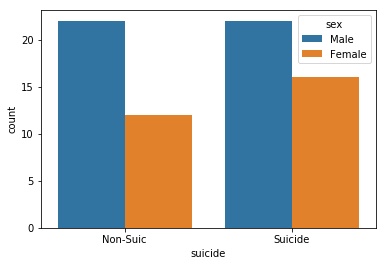

In [30]:
ax = sns.countplot(x="suicide", hue="sex", data=data)

$$P(suicide| Male)$$

In [41]:
data[(data["sex"] == "Male") & (data["suicide"] == "Suicide")].shape[0]/data[(data["sex"] == "Male")].shape[0]

0.5

$$P(suicide| Female)$$

In [42]:
data[(data["sex"] == "Female") & (data["suicide"] == "Suicide")].shape[0]/data[(data["sex"] == "Female")].shape[0]

0.5714285714285714

In [113]:
data = data.drop(['group','gr','dt_start','dt_end','dose'], axis=1)

In [114]:
data = pd.get_dummies(data, columns=['sex'])

In [115]:
data['suicide'] = data.suicide.replace(to_replace=['Non-Suic', 'Suicide'], value=[0, 1])
data_y = data['suicide']
data_x = data.drop('suicide', axis = 1)

# Use random forest to identify important features

Randomforest algorithm also says that there age and sex is not important.

In [43]:
data = pd.read_csv('final_df.csv')

In [44]:
data = data.iloc[::2, :]

In [22]:
data.head()

,Patient,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,2AAA_HUMAN,2ABA_HUMAN,...,YD018_HUMAN,YKT6_HUMAN,ZBT26_HUMAN,ZN346_HUMAN,ZNF76_HUMAN,dose,age,sex,gr,suicide
0,766,13.787726,14.778525,14.071394,14.665839,11.264794,13.055630,16.054861,14.048699,12.969326,...,11.149859,12.324365,13.450442,11.115703,10.703296,2,56,Female,C,Non-Suic
2,811,13.809070,14.662353,14.213875,14.537931,10.617070,13.053167,15.990168,14.066942,12.777811,...,10.749525,12.186666,13.439400,11.009725,10.938700,2,72,Female,C,Non-Suic
4,892,13.372266,14.296781,14.082546,14.174213,10.010893,12.701251,15.542761,13.725006,12.778088,...,10.681553,12.174987,13.133127,10.675698,10.809151,2,50,Female,C,Non-Suic
6,1043,13.237846,14.105996,13.991277,14.065168,10.184080,12.746720,15.384763,13.772875,12.887360,...,10.428561,12.150732,12.899984,10.837388,10.484424,2,14,Female,C,Non-Suic
8,574,13.483786,14.218876,13.996217,14.239543,11.274700,12.728803,15.579854,13.970519,12.912875,...,10.761113,12.253854,12.482489,10.749516,10.538290,2,41,Female,MDD,Suicide


In [45]:
data = data.drop(['dose','gr'],axis=1)
data = pd.get_dummies(data, columns=['sex'])
data['suicide'] = data.suicide.replace(to_replace=['Non-Suic', 'Suicide'], value=[0, 1])
data_y = data['suicide']
data_x = data.drop('suicide', axis = 1)

In [24]:
import warnings
from sklearn.ensemble import RandomForestClassifier

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    forest = RandomForestClassifier(n_estimators=50,class_weight="balanced")
    forest.fit(data_x,data_y)

In [25]:
importances = forest.feature_importances_

In [26]:
indices = np.argsort(importances)[::-1]

df_list = []

for f in range(data_x.shape[1]):
    df_list.append([list(data_x.columns)[indices[f]], importances[indices[f]]])
    
feature_rank = pd.DataFrame(df_list)
feature_rank = feature_rank.rename(columns={0:'feature',1:'importance'})

In [27]:
feature_rank[feature_rank['feature']=='sex_Male']

,feature,importance
349,sex_Male,0.0


In [28]:
feature_rank[feature_rank['feature']=='age']

,feature,importance
778,age,0.0


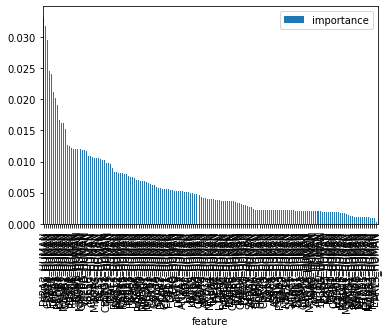

In [29]:
feature_rank[feature_rank['importance']>0].plot.bar(x='feature', y='importance', rot=90)

In [31]:
feature_rank[feature_rank['importance']>0]

,feature,importance
0,DIRA2_HUMAN,0.033235
1,SBDS_HUMAN,0.031687
2,CDK18_HUMAN,0.029474
3,GBF1_HUMAN,0.024599
4,FA49B_HUMAN,0.024037
...,...,...
161,NDUS2_HUMAN,0.001109
162,RAB43_HUMAN,0.000900
163,FABPH_HUMAN,0.000899
164,ELAV4_HUMAN,0.000889


There are totally around 166 features that have non zero importance.

# Visualize the distribution of the most important feature identified by Random Forest

DIRA2_HUMAN


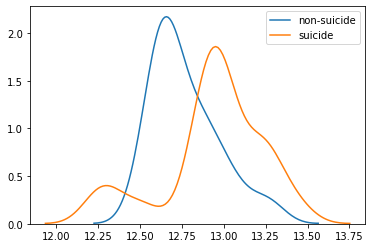

In [32]:
feature1 = feature_rank.iloc[0]['feature']
print(feature1)
sns.kdeplot(data[(data['suicide']==0)][feature1],label='non-suicide')
sns.kdeplot(data[(data['suicide']==1)][feature1],label='suicide')

# Run t-test to see which features are statistically significant between two groups

In [33]:
from scipy import stats

pvalues = []
for index,row in feature_rank[feature_rank['importance']>0].iterrows():
    feature = row['feature']
    if feature != 'dt_end':
        p = stats.ttest_ind(data[data['suicide']==0][feature],data[data['suicide']==1][feature])[1]
        
        pvalues.append([feature,p])

pvalues = pd.DataFrame(pvalues)
pvalues = pvalues.rename(columns={0:'feature',1:'pvalues'})
pvalues

,feature,pvalues
0,DIRA2_HUMAN,0.061131
1,SBDS_HUMAN,0.020540
2,CDK18_HUMAN,0.018611
3,GBF1_HUMAN,0.002069
4,FA49B_HUMAN,0.001225
...,...,...
161,NDUS2_HUMAN,0.378460
162,RAB43_HUMAN,0.789638
163,FABPH_HUMAN,0.200923
164,ELAV4_HUMAN,0.373014


In [34]:
pvalues[pvalues['pvalues']<0.05]

,feature,pvalues
1,SBDS_HUMAN,0.020540
2,CDK18_HUMAN,0.018611
3,GBF1_HUMAN,0.002069
4,FA49B_HUMAN,0.001225
5,DIRA1_HUMAN,0.000596
6,KAD3_HUMAN,0.015378
9,PHLB3_HUMAN,0.010999
12,SYFA_HUMAN,0.001335
13,RB6I2_HUMAN,0.000269
14,PP2BB_HUMAN,0.002407


At a 0.05 significance level, there are 156 features that are statistically significant between the two groups.

# Conduct non-parametric wilcoxon test

In [43]:
from scipy import stats

pvalues = []
for index,row in feature_rank[feature_rank['importance']>0].iterrows():
    feature = row['feature']
    if feature != 'dt_end':
        p = stats.wilcoxon(data[data['suicide']==0][feature],data[data['suicide']==1][feature].sample(n=34))[1]
        
        pvalues.append([feature,p])

pvalues = pd.DataFrame(pvalues)
pvalues = pvalues.rename(columns={0:'feature',1:'pvalues'})
pvalues

,feature,pvalues
0,PRS8_HUMAN,0.000781
1,NECP1_HUMAN,0.011678
2,PYC_HUMAN,0.130269
3,CSN4_HUMAN,0.046399
4,HINT2_HUMAN,0.082688
...,...,...
301,EHD3_HUMAN,0.638245
302,CRIP2_HUMAN,0.817468
303,ACTS_HUMAN,0.063600
304,RFC5_HUMAN,0.566825


In [44]:
pvalues[pvalues['pvalues']<0.05]

,feature,pvalues
0,PRS8_HUMAN,0.000781
1,NECP1_HUMAN,0.011678
3,CSN4_HUMAN,0.046399
5,GNAI2_HUMAN,0.042771
6,NCKP1_HUMAN,0.023495
7,TBA4B_HUMAN,0.026829
8,SYFA_HUMAN,0.000133
10,GBF1_HUMAN,0.011122
12,MBOA7_HUMAN,0.004918
13,CN166_HUMAN,0.010590


There are 287 significant features as opposed to 272 features from the previous t-test.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_cat = data_x[['sex_Male','sex_Female']]
data_x1 = data_x.drop(['sex_Male','sex_Female'], axis=1)
scaler = StandardScaler()
data_x2 = scaler.fit_transform(data_x1)
data_cat = np.array(data_cat)
data_x3 = np.append(data_x2, data_cat, 1)


In [47]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_x3)
kmeans.labels_

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [48]:
cluster = kmeans.labels_
truth = list(data_y)
pd.DataFrame(data={'cluster':cluster,'truth':truth})

,cluster,truth
0,0,0
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,0
8,0,1
9,0,1


In [49]:
c1,c2,c3 = 0,0,0
for i in range(0,len(cluster)):
    if (cluster[i] == 0) & (truth[i]==1):
        c1 = c1+1
    elif (cluster[i]==1) & (truth[i]==0):
        c2 = c2+1
    else:
        c3 = c3+1
    

The alogirthm can't predict gender given the genes.

In [50]:
print(c1)
print(c2)
print(c3)

14
9
13


# conduct non parametric anova to test difference between groups

In [52]:
from scipy.stats import kruskal

data = pd.read_csv('final_df.csv')
data = data.iloc[::2, :]
data.head()

,Patient,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,2AAA_HUMAN,2ABA_HUMAN,...,YD018_HUMAN,YKT6_HUMAN,ZBT26_HUMAN,ZN346_HUMAN,ZNF76_HUMAN,dose,age,sex,gr,suicide
0,766,13.787726,14.778525,14.071394,14.665839,11.264794,13.055630,16.054861,14.048699,12.969326,...,11.149859,12.324365,13.450442,11.115703,10.703296,2,56,Female,C,Non-Suic
2,811,13.809070,14.662353,14.213875,14.537931,10.617070,13.053167,15.990168,14.066942,12.777811,...,10.749525,12.186666,13.439400,11.009725,10.938700,2,72,Female,C,Non-Suic
4,892,13.372266,14.296781,14.082546,14.174213,10.010893,12.701251,15.542761,13.725006,12.778088,...,10.681553,12.174987,13.133127,10.675698,10.809151,2,50,Female,C,Non-Suic
6,1043,13.237846,14.105996,13.991277,14.065168,10.184080,12.746720,15.384763,13.772875,12.887360,...,10.428561,12.150732,12.899984,10.837388,10.484424,2,14,Female,C,Non-Suic
8,574,13.483786,14.218876,13.996217,14.239543,11.274700,12.728803,15.579854,13.970519,12.912875,...,10.761113,12.253854,12.482489,10.749516,10.538290,2,41,Female,MDD,Suicide


In [53]:
data['gr'].unique()

array(['C', 'MDD', 'MDD*SSRI'], dtype=object)

In [54]:
grp_c = data[data['gr']=='C']
grp_mdd = data[data['gr']=='MDD']
grp_ssri = data[data['gr']=='MDD*SSRI']

In [56]:
grp_c = grp_c.drop(['Patient','dose','sex','suicide'],axis=1)
grp_mdd = grp_mdd.drop(['Patient','dose','sex','suicide'],axis=1)
grp_ssri = grp_ssri.drop(['Patient','dose','sex','suicide'],axis=1)

# comparison among all three

We will look at the features between groups that are different

In [59]:
cols = grp_c.columns
def conduct_tests(group1, group2, group3):
    results = []
    for col in cols:
        p_val = stats.kruskal(group1[col], group2[col],group3[col])[1]
        if p_val < 0.05:
            results.append([col,p_val])
            
    return pd.DataFrame(results)
        
results = conduct_tests(grp_c, grp_mdd, grp_ssri)

In [61]:
qual_cols = results[0]

In [69]:
len(qual_cols)

191

In [98]:
qual_cols

0      1433S_HUMAN
1      ACOT2_HUMAN
2       ACTG_HUMAN
3       ACTS_HUMAN
4       ADT3_HUMAN
          ...     
186      VGF_HUMAN
187     VPP1_HUMAN
188    VPS29_HUMAN
189    ZNF76_HUMAN
190             gr
Name: 0, Length: 191, dtype: object

# run pairwise on the 190 columns - c and mdd

In [72]:
def conduct_tests(group1, group2):
    results = []
    for col in qual_cols:
        p_val = stats.kruskal(group1[col], group2[col])[1]
        if p_val < 0.05:
            results.append([col,p_val])
            
    return pd.DataFrame(results)

results_c_mdd = conduct_tests(grp_c, grp_mdd)
results_c_ssri = conduct_tests(grp_c, grp_ssri)
results_mdd_ssri = conduct_tests(grp_mdd, grp_ssri)

In [83]:
print("Number of proteins having significant difference between C and MDD is: ")
print(results_c_mdd.shape[0])
print("Number of proteins having significant difference between C and MDD*SSRI is: ")
print(results_c_ssri.shape[0])
print("Number of proteins having significant difference between MDD and MDD*SSRI is: ")
print(results_mdd_ssri.shape[0])

Number of proteins having significant difference between C and MDD is: 
132
Number of proteins having significant difference between C and MDD*SSRI is: 
184
Number of proteins having significant difference between MDD and MDD*SSRI is: 
11


In [75]:
res_c_mdd_proteins = list(results_c_mdd[0])
res_c_ssri_proteins = list(results_c_ssri[0])
res_mdd_ssri_proteins = list(results_mdd_ssri[0])

In [105]:
set(res_c_mdd_proteins) & set(res_c_ssri_proteins) & set(res_mdd_ssri_proteins)

{'GSK3B_HUMAN', 'RGS2_HUMAN', 'gr'}

# visualizing box plots of the above two proteins that differ among all 3 groups

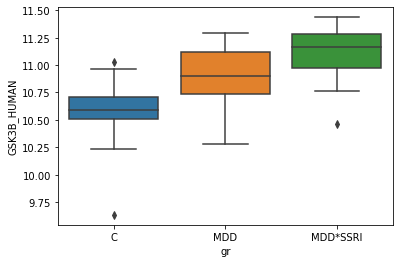

In [108]:
sns.boxplot(x='gr',y='GSK3B_HUMAN',data=data[['GSK3B_HUMAN','gr']])

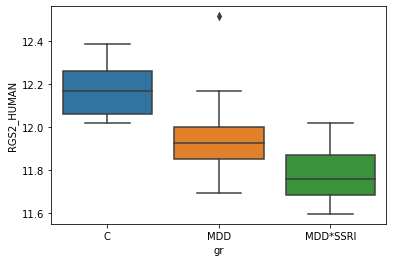

In [109]:
sns.boxplot(x='gr',y='RGS2_HUMAN',data=data[['RGS2_HUMAN','gr']])

# common between c_mdd and c_ssri

In [85]:
count = 0
for val in res_c_mdd_proteins:
    if val in res_c_ssri_proteins:
        count = count + 1
        print(val)
print(count)

1433S_HUMAN
ACOT2_HUMAN
ACTS_HUMAN
ADT3_HUMAN
AP180_HUMAN
AP3D1_HUMAN
ARL3_HUMAN
ARP2_HUMAN
ARPC2_HUMAN
ATD3A_HUMAN
ATPK_HUMAN
AUXI_HUMAN
BDH_HUMAN
C1QR1_HUMAN
CADM2_HUMAN
CADM4_HUMAN
CAMKV_HUMAN
CB042_HUMAN
CBWD3_HUMAN
CC74A_HUMAN
CCD65_HUMAN
CCNE2_HUMAN
CDK13_HUMAN
CN166_HUMAN
COR1C_HUMAN
CPNE8_HUMAN
CTF8A_HUMAN
CTL1_HUMAN
CTNA2_HUMAN
DC1L2_HUMAN
DDX25_HUMAN
DEMA_HUMAN
DFFA_HUMAN
DIRA1_HUMAN
DLG4_HUMAN
DMAP1_HUMAN
E41L1_HUMAN
EAA1_HUMAN
FA49B_HUMAN
FABP7_HUMAN
GBF1_HUMAN
GNA12_HUMAN
GNAI2_HUMAN
GNAL_HUMAN
GPM6A_HUMAN
GRB2_HUMAN
GRHPR_HUMAN
GSK3B_HUMAN
H13_HUMAN
H2AW_HUMAN
H2B1J_HUMAN
HBD_HUMAN
HOME1_HUMAN
HPCL1_HUMAN
HPLN1_HUMAN
HPT_HUMAN
HS905_HUMAN
HSDL2_HUMAN
IDHC_HUMAN
IMPA1_HUMAN
K1H2_HUMAN
KAP3_HUMAN
KAPCB_HUMAN
L2GL1_HUMAN
LDHA_HUMAN
MA6D1_HUMAN
MAL2_HUMAN
MAP4_HUMAN
MIF_HUMAN
ML12B_HUMAN
MRT4_HUMAN
MTCH2_HUMAN
MYL6_HUMAN
NCEH1_HUMAN
NDUS3_HUMAN
NECP1_HUMAN
NP1L4_HUMAN
NPTN_HUMAN
ODPAT_HUMAN
OXR1_HUMAN
PA1B3_HUMAN
PAXX_HUMAN
PGK2_HUMAN
PHLB3_HUMAN
POTEI_HUMAN
PP2BB_HUMAN
PRDX6

# common between c_mdd and mdd_ssri

In [84]:
count2 = 0
for val in res_c_mdd_proteins:
    if val in res_mdd_ssri_proteins:
        print(val)
        count2 += 1
print(count2)

GSK3B_HUMAN
RGS2_HUMAN
VGF_HUMAN
gr
4


# common between c_ssri and mdd_ssri

In [87]:
count3 = 0
for val in res_c_ssri_proteins:
    if val in res_mdd_ssri_proteins:
        print(val)
        count3 += 1
print(count3)

ACTG_HUMAN
AIFM1_HUMAN
ANXA7_HUMAN
ARPC3_HUMAN
G3P_HUMAN
GSK3B_HUMAN
MTX1_HUMAN
PDIA6_HUMAN
RGS2_HUMAN
gr
10


# Visualizing GSK3B_HUMAN for C and MDD groups

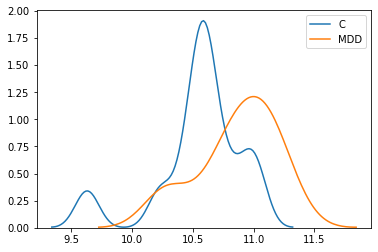

In [86]:
sns.kdeplot(data[(data['gr']=='C')]['GSK3B_HUMAN'],label='C')
sns.kdeplot(data[(data['gr']=='MDD')]['GSK3B_HUMAN'],label='MDD')

# Visualizing ACTG_HUMAN, 1433S_HUMAN for C and MDD*SSRI groups

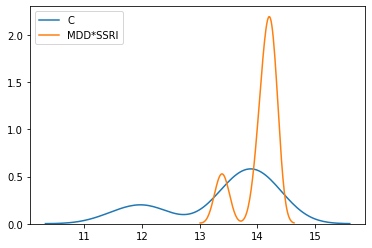

In [88]:
sns.kdeplot(data[(data['gr']=='C')]['ACTG_HUMAN'],label='C')
sns.kdeplot(data[(data['gr']=='MDD*SSRI')]['ACTG_HUMAN'],label='MDD*SSRI')

# Boxplot for ACTG_HUMAN separated by groups

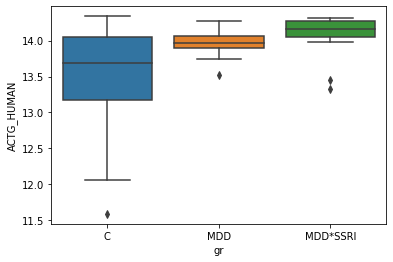

In [97]:
sns.boxplot(x='gr',y='ACTG_HUMAN',data=data[['ACTG_HUMAN','gr']])

# Boxplot for 1433S_HUMAN separated by groups

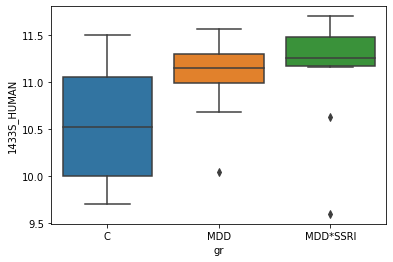

In [99]:
sns.boxplot(x='gr',y='1433S_HUMAN',data=data[['1433S_HUMAN','gr']])

# Boxplot for AIFM1_HUMAN separated by groups

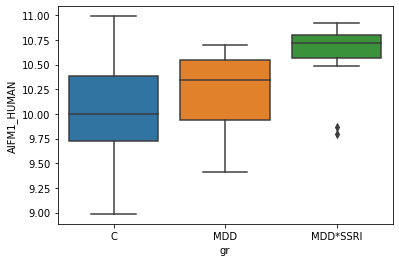

In [101]:
sns.boxplot(x='gr',y='AIFM1_HUMAN',data=data[['AIFM1_HUMAN','gr']])

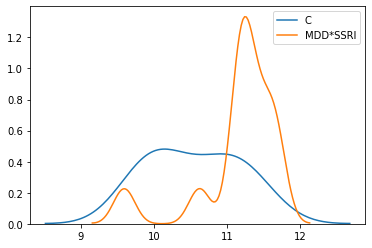

In [90]:
sns.kdeplot(data[(data['gr']=='C')]['1433S_HUMAN'],label='C')
sns.kdeplot(data[(data['gr']=='MDD*SSRI')]['1433S_HUMAN'],label='MDD*SSRI')